# Problem Statement:

##### Making Clustering using a dataset that contains information like quality radius_mean, texture_mean, perimeter_mean,area_mean, smoothness_mean, compactness_mean, concavity_mean,etc.

###### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder

## Part - 1 Data Exploration and Preprocessing

#### 1 - Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Unsupervised\Clustering\P10_Cancer_Data_Analysis\Python_Clustering_Pr.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 2 - Finding the shape of Dataset

In [3]:
print("No. of Rows: ", df.shape[0])
print("No.of Columns: ", df.shape[1])

No. of Rows:  569
No.of Columns:  32


#### 3 - Checking information of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 4 - Checking the Null values

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### 5 - Droping the unnamed and id column

In [7]:
df.drop('id',axis=1,inplace=True)

#### 6 - Checking value counts in diagnosis columns

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### 7 - Removing Label Column named Diagnosis

In [9]:
df1 = df.drop('diagnosis',axis=1)

#### 8 - Creating pair plot between two column radius_mean, texture_mean and radius_mean by diagnosis

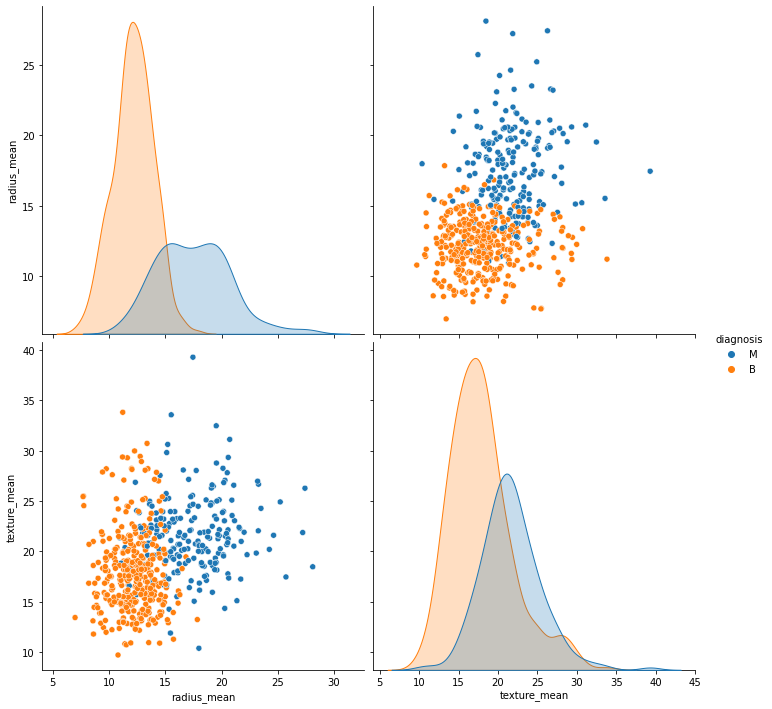

In [10]:
sns.pairplot(df.loc[:,['radius_mean','texture_mean','diagnosis']],hue='diagnosis',height=5);

#### 9 - Selecting only two feature radius_mean & texture_mean for clustering in new dataset

In [11]:
feature = df[['radius_mean','texture_mean']]

#### 10 - Applying Scaling to this new dataset

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()

In [14]:
scaled = ss.fit_transform(feature)
scaled = pd.DataFrame(feature,columns=['radius_mean','texture_mean'])

## Part - 2 Working with the Model

#### 1 - Display hierarchical clustering as a dendrogram using scipy

In [15]:
import scipy.cluster.hierarchy as sch

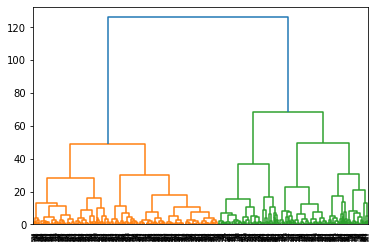

In [16]:
dendrogram = sch.dendrogram(sch.linkage(feature,method='ward'))

#### 2 - Apply AgglomerativeClustering on dataset with 2 n number of clusters

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')

#### 3 - Predict the cluster and create new column for cluster label data

In [19]:
cluster = ac.fit_predict(feature)

In [20]:
scaled['Label'] = cluster

#### 4 - Checking the count of the label

In [21]:
scaled.Label.value_counts()

1    314
0    255
Name: Label, dtype: int64

#### 5 - Plotting the label data

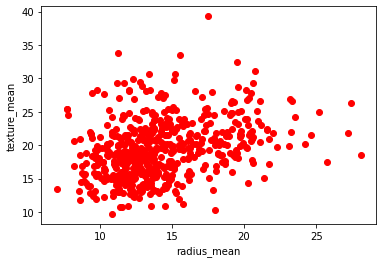

In [22]:
plt.scatter(scaled["radius_mean"],scaled["texture_mean"],color = "red")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

#### 6 - Checking Silhouette Score

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
ss = silhouette_score(scaled,cluster)

In [25]:
ss

0.4187350694561611

#### 7 - Now applying kmeans clustering no dataset with 2 number of clusters

In [26]:
from sklearn.cluster import KMeans

In [27]:
model = KMeans(n_clusters=2)

In [28]:
model.fit(feature)

KMeans(n_clusters=2)

#### 8 - Checking WCSS Score

In [29]:
wcss = model.inertia_

In [30]:
wcss

9403.768240647714

#### 9 - Trying different N Numbers from 1 to 10 and plot the result of wcss score

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
WCSS = []
for i in range (1,11):
    km = KMeans(n_clusters=i)
    km.fit(feature)
    WCSS.append(km.inertia_)
print(WCSS)

[17561.326763272406, 9403.907841654216, 6745.730156517316, 5152.4792010153315, 4334.728105092204, 3657.533428651679, 3164.3597737310843, 2821.990610621773, 2567.000183628971, 2343.3211392062544]


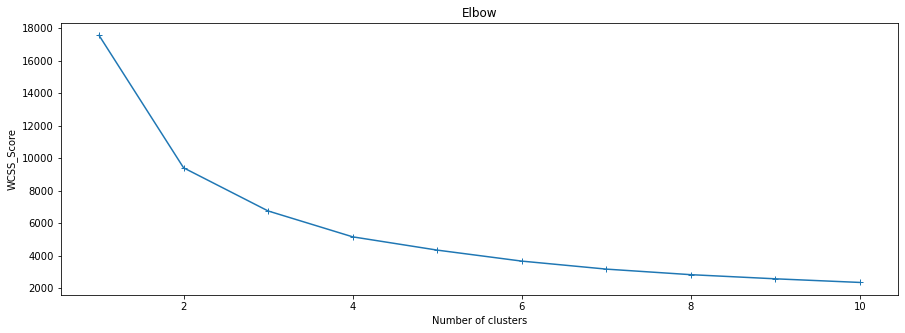

In [33]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11),WCSS, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_Score')
plt.title('Elbow')
plt.show()

N = 4 is better for this model

#### 10 - Applying kmeans again with different no. of cluster according to best wcss score

In [34]:
km = KMeans(n_clusters=4)
kmn = km.fit_predict(feature)

#### 11 - Creating Column for Label Cluster

In [35]:
feature['label'] = kmn

In [36]:
feature.head()

,radius_mean,texture_mean,label
0,17.99,10.38,1
1,20.57,17.77,2
2,19.69,21.25,2
3,11.42,20.38,0
4,20.29,14.34,2
